# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [1]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [9]:
max(data.user_id), max(data.item_id)

(942, 1680)

In [10]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix(
    (
        data['rating'].values, # data to be filled in the matrix
        (data['user_id'].values,data['item_id'].values) # rows and columns
    ),
    shape=(max(data.user_id)+1,max(data.item_id)+1) # shape of matrix (+1 is because index starts with 0)
)

In [11]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [12]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [13]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [14]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice

U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=50, n_iter=10, random_state=43)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 50)
(50,)
(1681, 50)


<font color='red'>Compute mean of ratings</font>

In [15]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return np.mean(ratings)

In [16]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [17]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [32]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    B = np.zeros(dim)

    return list(B)

In [121]:
dim= adjacency_matrix.shape[0] # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [122]:
dim= adjacency_matrix.shape[1] # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [123]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [124]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    
    db = 2*alpha*b_i[user_id] - 2*(rating- mu- b_i[user_id]- c_j[item_id]- (np.dot(U[user_id],V.T[item_id] )))
    return db


<font color='cyan'>Grader function -4 </font>

In [125]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [126]:
def derivative_dc(user_id,item_id,rating,U,V,mu, alpha):
    '''In this function, we will compute dL/dc_j'''
    db = 2*alpha*c_j[item_id] - 2*(rating- mu- b_i[user_id]- c_j[item_id]- (np.dot(U[user_id],V.T[item_id] )))
    return db

<font color='cyan'>Grader function - 5 </font>

In [127]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r) 
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [128]:
U2, Sigma2, V2 = randomized_svd(adjacency_matrix, n_components=50, n_iter=10, random_state=43)
lr = 0.01 # learning rate

In [129]:
from sklearn.metrics import mean_squared_error

In [148]:
from tqdm import trange

In [149]:
epoch=30 # no.of epoch
MSE = [] # list to store MSE for each epoch

# initializing B and C
b_i = initialize(adjacency_matrix.shape[0])
c_j = initialize(adjacency_matrix.shape[1])

mu=m_u(data['rating']) # finding mean value of all rating
alpha = 0.01
for e in trange(epoch): # for each epoch
    
    y_hat = [] # to store y_predicted for each epoch
    for i in range(len(data)): # for each datapoint
        u_id = data['user_id'].iloc[i]
        i_id = data['item_id'].iloc[i]
        rtng = data['rating'].iloc[i]
        b_i[u_id] = b_i[u_id] - lr * derivative_db(u_id, i_id, rtng, U2, V2, mu, alpha)
        c_j[i_id] = c_j[i_id] - lr * derivative_dc(u_id, i_id, rtng, U2, V2, mu, alpha)
        
        yij = mu + b_i[u_id] + c_j[i_id] + np.dot(U2[data.user_id.iloc[i]].T, V2.T[data.item_id.iloc[i]])
        y_hat.append(yij)
              
    mse = mean_squared_error(data.rating.values, y_hat)
    MSE.append(mse)
    print(mse)

  3%|██▊                                                                                | 1/30 [00:09<04:31,  9.37s/it]

0.9016762989587581


  7%|█████▌                                                                             | 2/30 [00:18<04:19,  9.27s/it]

0.8188879205568885


 10%|████████▎                                                                          | 3/30 [00:27<04:09,  9.22s/it]

0.8036238580663191


 13%|███████████                                                                        | 4/30 [00:36<04:00,  9.27s/it]

0.7972788259514956


 17%|█████████████▊                                                                     | 5/30 [00:46<03:55,  9.43s/it]

0.7939994020484421


 20%|████████████████▌                                                                  | 6/30 [00:56<03:49,  9.55s/it]

0.7920635023029331


 23%|███████████████████▎                                                               | 7/30 [01:06<03:39,  9.54s/it]

0.7908075366293013


 27%|██████████████████████▏                                                            | 8/30 [01:15<03:27,  9.45s/it]

0.7899327617986935


 30%|████████████████████████▉                                                          | 9/30 [01:24<03:16,  9.37s/it]

0.7892893604939921


 33%|███████████████████████████▎                                                      | 10/30 [01:33<03:05,  9.28s/it]

0.7887957233871079


 37%|██████████████████████████████                                                    | 11/30 [01:42<02:56,  9.27s/it]

0.7884042932188897


 40%|████████████████████████████████▊                                                 | 12/30 [01:51<02:44,  9.15s/it]

0.78808573129856


 43%|███████████████████████████████████▌                                              | 13/30 [02:00<02:33,  9.05s/it]

0.7878210318047517


 47%|██████████████████████████████████████▎                                           | 14/30 [02:09<02:26,  9.13s/it]

0.7875973536465711


 50%|█████████████████████████████████████████                                         | 15/30 [02:20<02:22,  9.48s/it]

0.7874057013370984


 53%|███████████████████████████████████████████▋                                      | 16/30 [02:29<02:11,  9.37s/it]

0.78723957478486


 57%|██████████████████████████████████████████████▍                                   | 17/30 [02:38<02:02,  9.43s/it]

0.7870941506008715


 60%|█████████████████████████████████████████████████▏                                | 18/30 [02:48<01:54,  9.52s/it]

0.7869657671828835


 63%|███████████████████████████████████████████████████▉                              | 19/30 [02:57<01:43,  9.37s/it]

0.7868515899952676


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [03:06<01:33,  9.32s/it]

0.7867493874255046


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [03:15<01:22,  9.21s/it]

0.7866573766313585


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [03:24<01:12,  9.07s/it]

0.7865741149608929


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [03:33<01:03,  9.03s/it]

0.786498421821607


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [03:42<00:54,  9.12s/it]

0.7864293213770439


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [03:51<00:45,  9.01s/it]

0.786365999796551


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [04:00<00:35,  8.96s/it]

0.7863077728725967


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [04:09<00:26,  8.90s/it]

0.7862540611544782


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [04:17<00:17,  8.85s/it]

0.7862043706186114


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [04:26<00:08,  8.83s/it]

0.7861582774762194


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [04:35<00:00,  9.18s/it]

0.78611541611349


<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

In [134]:
import matplotlib.pyplot as plt

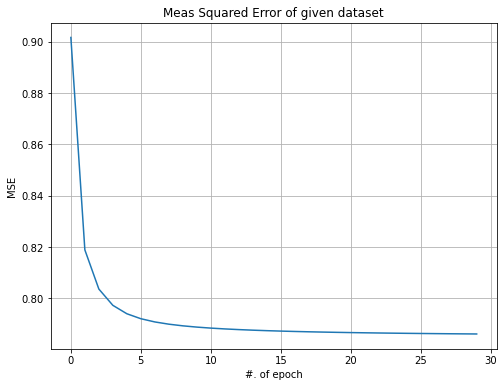

In [140]:
plt.figure(figsize=(8,6))
plt.plot(list(range(epoch)), MSE)
plt.title('Meas Squared Error of given dataset')
plt.xlabel('#. of epoch')
plt.ylabel('MSE')
plt.grid(True)
plt.show()


<br>

<font color='red'> Task 2</font>

In [143]:
U2[0]

array([ 0.0662257 ,  0.00788852, -0.01253126, -0.08616387,  0.02486961,
        0.0066612 ,  0.08005114, -0.02756662,  0.06756802,  0.02042077,
       -0.02615953,  0.02650122, -0.03948423,  0.03992232, -0.01442573,
        0.00171249, -0.07894435,  0.01197095, -0.06763539, -0.05474592,
       -0.11436075, -0.01092713,  0.04383823, -0.05682249,  0.04246676,
        0.05950109, -0.09346606,  0.05188234,  0.00157581, -0.00749872,
       -0.04618425, -0.01912017,  0.10022757, -0.124795  ,  0.03214906,
        0.02922167, -0.03988895,  0.11293893, -0.03250723,  0.03664773,
       -0.02877647, -0.05587925,  0.01621883,  0.00082109,  0.11883379,
       -0.07604553, -0.02367046, -0.05205898, -0.0412519 , -0.06143904])

In [146]:
V2.T[0]

array([ 0.09432076, -0.09365604, -0.00510748, -0.04886658, -0.15781319,
       -0.10065238,  0.08857685,  0.01377174, -0.08417885,  0.01251122,
        0.04529933,  0.06561506, -0.02090652,  0.02445128, -0.04001537,
       -0.07490333,  0.00961507,  0.01239697,  0.02700041, -0.00037579,
       -0.01629441, -0.10761141,  0.13925566,  0.06462811,  0.11077665,
        0.02480097, -0.08333359, -0.04316252, -0.17443817, -0.14669366,
       -0.08286182,  0.13359107,  0.0753128 , -0.0693474 , -0.08085442,
       -0.10298338,  0.01293713, -0.04579897, -0.03937351,  0.09870291,
       -0.02529772,  0.06006946,  0.033592  , -0.09808428,  0.02033945,
        0.07227342, -0.07508876, -0.04926345,  0.02038772, -0.08206805])

In [150]:
U2.shape, Sigma2.shape, V2.shape

((943, 50), (50,), (50, 1681))

In [152]:
user_info = pd.read_csv('user_info.csv.txt')
user_info.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [180]:
Y = user_info['is_male'].values

In [181]:
Y.shape

(943,)

In [233]:
def model_processing(modelName):
    model = modelName
    
    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_test)
    x_hat = model.predict(X_train)
    print("Train accuracy of the model : ", accuracy_score(y_train, x_hat))
    print("*"*50)
    print("Test Accuracy of the model : ", accuracy_score(y_test, y_hat))
    print("*"*50)
    print("Confusion matrix of the model on test dataset:\n", confusion_matrix(y_test, y_hat))
    print("*"*50)
    print("Classification report of the model on test dataset:\n",classification_report(y_test, y_hat))
    temp_dict = {}
    temp_dict['train_accuracy'] = accuracy_score(y_train, x_hat)
    temp_dict['test_accuracy'] = accuracy_score(y_test, y_hat)
    temp_dict['confusion_matrix'] = confusion_matrix(y_test, y_hat)
    temp_dict['classification_report'] = classification_report(y_test,y_hat)
    return temp_dict

### Logistic Regression

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
model = LogisticRegression()

In [159]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(U, Y, test_size=0.2, random_state=43)

In [183]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((754, 50), (189, 50), (754,), (189,))

    **Logistic Regression without class balance**

In [227]:
lr_result = model_processing(model)

Train accuracy of the model :  0.713527851458886
**************************************************
Test Accuracy of the model :  0.6984126984126984
**************************************************
Confusion matrix of the model on test dataset:
 [[  0  57]
 [  0 132]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.70      1.00      0.82       132

    accuracy                           0.70       189
   macro avg       0.35      0.50      0.41       189
weighted avg       0.49      0.70      0.57       189



C:\Users\localadmin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Above model is dumb means data is not linearly separable.

In [228]:
lr_balanced_model = LogisticRegression(class_weight='balanced')
lr_balanced_model_result = model_processing(lr_balanced_model)

Train accuracy of the model :  0.7440318302387268
**************************************************
Test Accuracy of the model :  0.6878306878306878
**************************************************
Confusion matrix of the model on test dataset:
 [[36 21]
 [38 94]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.49      0.63      0.55        57
           1       0.82      0.71      0.76       132

    accuracy                           0.69       189
   macro avg       0.65      0.67      0.66       189
weighted avg       0.72      0.69      0.70       189



    Yeah, class_weight='balanced' works well

### KNN 

In [247]:
from sklearn.neighbors import KNeighborsClassifier

In [248]:
knn = KNeighborsClassifier()

In [250]:
knn_result = model_processing(knn)

Train accuracy of the model :  0.7798408488063661
**************************************************
Test Accuracy of the model :  0.6613756613756614
**************************************************
Confusion matrix of the model on test dataset:
 [[ 18  39]
 [ 25 107]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.42      0.32      0.36        57
           1       0.73      0.81      0.77       132

    accuracy                           0.66       189
   macro avg       0.58      0.56      0.56       189
weighted avg       0.64      0.66      0.65       189



### KNN weighted

In [251]:
knn_w = KNeighborsClassifier(weights='distance')

In [253]:
knn_w_result = model_processing(knn_w)

Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.6613756613756614
**************************************************
Confusion matrix of the model on test dataset:
 [[ 18  39]
 [ 25 107]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.42      0.32      0.36        57
           1       0.73      0.81      0.77       132

    accuracy                           0.66       189
   macro avg       0.58      0.56      0.56       189
weighted avg       0.64      0.66      0.65       189



### KNN with hyper-parameter K

In [254]:
neighbors = [1,3,5,7,11,15,20,25,35,40,50]

In [256]:
knn_results = []
for k in neighbors:
    print("#-"*50)
    print(" K = ",k)
    temp_model = KNeighborsClassifier(weights='distance', n_neighbors=k)
    knn_results.append(model_processing(temp_model))
    print("#-"*50)

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-
 K =  1
Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.671957671957672
**************************************************
Confusion matrix of the model on test dataset:
 [[ 25  32]
 [ 30 102]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.45      0.44      0.45        57
           1       0.76      0.77      0.77       132

    accuracy                           0.67       189
   macro avg       0.61      0.61      0.61       189
weighted avg       0.67      0.67      0.67       189

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-
#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-
 K

Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.6984126984126984
**************************************************
Confusion matrix of the model on test dataset:
 [[  1  56]
 [  1 131]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.50      0.02      0.03        57
           1       0.70      0.99      0.82       132

    accuracy                           0.70       189
   macro avg       0.60      0.50      0.43       189
weighted avg       0.64      0.70      0.58       189

#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-


    let's try Tree based model

### DecisionTreeClassifier

without class balance

In [230]:
from sklearn.tree import DecisionTreeClassifier
tmodel = DecisionTreeClassifier()
tmodel_result = model_processing(tmodel)

Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.6772486772486772
**************************************************
Confusion matrix of the model on test dataset:
 [[ 20  37]
 [ 24 108]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.45      0.35      0.40        57
           1       0.74      0.82      0.78       132

    accuracy                           0.68       189
   macro avg       0.60      0.58      0.59       189
weighted avg       0.66      0.68      0.66       189



    let's try with weight='balanced'

### DecisionTreeClassifier with class balanced

In [198]:
btmodel = DecisionTreeClassifier(class_weight='balanced')

In [231]:
bt_model_result = model_processing(btmodel)

Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.656084656084656
**************************************************
Confusion matrix of the model on test dataset:
 [[ 23  34]
 [ 31 101]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.43      0.40      0.41        57
           1       0.75      0.77      0.76       132

    accuracy                           0.66       189
   macro avg       0.59      0.58      0.59       189
weighted avg       0.65      0.66      0.65       189



### RandomForestClassifier

    Let's try with ensemble models to increase test accuracy

    **RandomForest Classifier**

without class balanced

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [232]:
rfmodel = RandomForestClassifier()
rfmodel_result = model_processing(rfmodel)

Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.7301587301587301
**************************************************
Confusion matrix of the model on test dataset:
 [[ 11  46]
 [  5 127]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.69      0.19      0.30        57
           1       0.73      0.96      0.83       132

    accuracy                           0.73       189
   macro avg       0.71      0.58      0.57       189
weighted avg       0.72      0.73      0.67       189



<pre><b>Random Forest Classifier with class-weight='balanced'

In [234]:
rfmodel_weighted = RandomForestClassifier(class_weight='balanced')

In [235]:
rfmodel_weighted_result = model_processing(rfmodel_weighted)

Train accuracy of the model :  1.0
**************************************************
Test Accuracy of the model :  0.7248677248677249
**************************************************
Confusion matrix of the model on test dataset:
 [[  8  49]
 [  3 129]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.73      0.14      0.24        57
           1       0.72      0.98      0.83       132

    accuracy                           0.72       189
   macro avg       0.73      0.56      0.53       189
weighted avg       0.73      0.72      0.65       189



        Let's try with Gradient boosting classifier

In [245]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

models={
    'gradient boosting classifier':GradientBoostingClassifier(),
    'adaboost classifier':AdaBoostClassifier(),
    'Bagging classifier':BaggingClassifier(),
    'Extra tree classifier': ExtraTreesClassifier()
}

In [257]:
models_results = {}
for k, v in models.items():
    print("Model = ",k)
    print()
    models_results[k] = model_processing(v)
    print("*"*100)

Model =  gradient boosting classifier

Train accuracy of the model :  0.9708222811671088
**************************************************
Test Accuracy of the model :  0.746031746031746
**************************************************
Confusion matrix of the model on test dataset:
 [[ 20  37]
 [ 11 121]]
**************************************************
Classification report of the model on test dataset:
               precision    recall  f1-score   support

           0       0.65      0.35      0.45        57
           1       0.77      0.92      0.83       132

    accuracy                           0.75       189
   macro avg       0.71      0.63      0.64       189
weighted avg       0.73      0.75      0.72       189

****************************************************************************************************
Model =  adaboost classifier

Train accuracy of the model :  0.8713527851458885
**************************************************
Test Accuracy of the model 

<p style="font-family:'Segoe UI';font-size:14px"><b>Summary:</b><br>
    After training many models, I realized that the feature U that we get after Matrix decomposition is also represents the 'GENDER' with a good accuracy.
    </p>